# ACT/SAT Data EDA and Data Visualization

**Prepared by: Melody Wu**  

<img src="https://media.npr.org/assets/img/2020/06/11/npr_college_test_demise_franziska_barczyk_final_custom-95a001405a5cae85cded607043dadf718fedeb44-s1600-c85.jpg" style="height: 400px">

--- 
## Contents:
The rest of the report is organized as below: 
1. Problem Statement
2. Background
3. Data Import and Cleaning
4. Exploratory Data Analysis (EDA)
5. Data Visualization
6. Data Export
7. Conclusions and Recommendations

## 1. Motivations and Problem Statement

### 1.1 Motivations

According to [U.S. Department of Education](https://www.ed.gov/news/press-releases/new-state-state-college-attainment-numbers-show-progress-toward-2020-goal), the college attainment rate of the State of California (37.6%) is below the national average (38.8%). One way to increase the number of college-going students is to increase the number of students applying to colleges.  

According to the [California Department of Education](https://www.cde.ca.gov/ds/sd/cb/ceffingertipfacts.asp), the State of California has over 1,000 school districts (including 346 Unifed, 525 Elementary, 78 High, and 88 Other). Amongst these school districts, there is significant heterogeneity in terms of enrollment sizes, budget allocations, family and student demographics (e.g., socio-economic status(SES)). Moreover, school quality, educational outcomes, and college readniness differ largely across there school districts.  

In order to increase the number of student applying to 4-year colleges, and ultimately to increase college attendance and attainment, the Department of Education is proposing a "Test for Success CA" Program to the State of California, which aims to provide extra funding for school distrcts that have low college application rates.   

With these funding, the school districts can implement relevant interventions, such as free test prep workshops and fee waivers. The goal of this program is to have more students apply to four-year colleges. Unfortunately, many of the schools and school districts do not have data on students' four-year college application status, namely whether a student has applied to four-year colleges.  

### 1.2 Problem Statement

Before 2020, standardized tests (i.e., the ACT and SAT tests) are mandatory requirements for most of the four-year colleges. Therefore, ACT/SAT participation rates of a school district can be used as a proxy of this school district's application status, assuming that students have taken the ACT/SAT tests also have applied to four-year colleges.   

By analyzing the ACT/SAT data and identifying the school districts that have lower ACT/SAT test participation rates, the State of California can allocate resources to school districts in need more efficiently and equitably. 

## 2. Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math. The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section. They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Although schools have made SAT/ACT requirement optional for their Fall 2021 applications, submitting SAT/ACT scores had been one of the mandatory requirements for college applications. School admission officials use SAT/ACT scores for admissions decisions and awarding merit-based scholarships. Because SAT/ACT tests are not free (fee waivers are available for qualifying students) and require students a significant amount of time to study and prepare, not all students take SAT/ACT tests; as a result, not all student can apply and attend college. This issue is especially daunting for schools and school districts with a high distribution of low-income, minority students. These students not only lack the resources but also the readiness to take SAT/ACT tests and further apply and attend college. Thus, states should identify interventions, recommend programs, and allocate resources to these districts in need. 

### 2.1 Data Selection

In this project, we will use the 2019 SAT/ACT data from the State of California as a case study to examine performance gaps among different schools districts and identify the lower performaning districts, which have lower percentage of ACT/SAT test takers and lower overall student performance. 

In addition, we will benchmark California's ACT/SAT performance with other States to show how urgently the State need to increase resources in college readiness programs.  

The below data sets will be used in this project. 

* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School

### 2.2 Outside Research

According to [Magoosh](https://magoosh.com/hs/sat/states-that-require-the-act-or-sat/), a test preparation organization, some states require the ACT or SAT tests for all their graduating high school students, regardless whether these students intend to attend a four-year college or not. In the below figure, the green-colored states required all their Grade 12 students to take ACT/SAT tests and pay for the cost. However, California is not one of them. 

<img src="../image/magoosh_map.png" style="height: 400px">

### 2.3 Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!

In [1]:
# mean_here() takes a list of number and return the mean/average of it. 
def mean_here(list_of_num):
    total = 0
    n = len(list_of_num)
    for each in list_of_num:
        total += each
    return total / n

In [2]:
# testing mean_here()
mean_here([1,2,3,4])

2.5

In [3]:
# testing mean_here
mean_here([1,2,3,4,5,6,7,8])

4.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.

In [4]:
def sd_here(list_of_num):
    total = 0
    mu = mean_here(list_of_num)
    n = len(list_of_num)
    for each in list_of_num:
        total += (each - mu)**2
    return total / n

In [5]:
sd_here([1,2,3,4])

1.25

3. Data cleaning function: write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. 


In [6]:
# strpc_to_float() takes in a string that is a number and a percent symbol and converts
# this to a float that is the decimal approximation of the percent
def strpc_to_float(string_percent):
    float_percent = float(string_percent.replace('%',''))/100
    decimal_appx = len(string_percent.replace('%','')) # setting up the decimal to round to
    return round(float_percent,decimal_appx)

In [7]:
strpc_to_float('40.99987%')

0.4099987

4. Importing the relevant libraries

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # import the pyplot module 
import seaborn as sns
import missingno as msno

## 3. Data Import and Cleaning

### 3.1 Loading csv files into DataFrame and assign names to the datasets

The below data sets will be used in this project. 

* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School

In [9]:
# import using pandas.read_csv('relative path to the files') 
act_2019 = pd.read_csv('../data/act_2019.csv') # './data/act_2019.csv' is a relative path
sat_2019 = pd.read_csv('../data/sat_2019.csv') 
act_2019_ca = pd.read_csv('../data/act_2019_ca.csv') 
sat_2019_ca = pd.read_csv('../data/sat_2019_ca.csv') 

### 3.2 Setting up the DataFrames
#### 3.2.1 DataFrame#1: 2019 ACT Scores by State

The 2019 ACT Scores by State file has 52 rows and 3 columns **('state', 'participation', 'composite')**. There is no missing values in this DataFrame. 

In [10]:
# displaying the first 5 rows
act_2019.head(5)

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [11]:
# checking NaN of each of the columns
# There is no missing values in this DataFrame
act_2019.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [12]:
# using .str.lower() to change column names to lower case
act_2019.columns = act_2019.columns.str.lower()

In [13]:
# using .info() to check data type and found that participation rate is a string, which should be a float
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     object 
 2   composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


#### 3.2.2 DataFrame#2: 2019 SAT Scores by State

The 2019 SAT Scores by State file has 53 rows and 5 columns **('state', 'participation rate', 'ebrw', 'math', 'total')**. It is also noted that in addition to informaiton of the 50 States, this data also include informaiton of Puerto Rico and Virgin Islands. There is no missing values in this DataFrame.

In [14]:
# displaying first 5 row
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [15]:
# checking NaN and found that there is no missing data
sat_2019.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [16]:
sat_2019.columns = sat_2019.columns.str.lower()

In [17]:
# drop unnecessary columns: ebrw and math
# using df.drop(['B', 'C'], axis=1) to drop columns (axis = 1 by using column names)
sat_2019.drop(['ebrw', 'math'], axis = 1, inplace = True)

In [18]:
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               53 non-null     object
 1   participation rate  53 non-null     object
 2   total               53 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


#### 3.2.3 DataFrame#3: 2019 ACT Scores of California

The 2019 ACT Scores of California file has 2310 rows and 18 columns **('cds', 'ccode', 'cdcode', 'scode', 'rtype', 'sname', 'dname', 'cname', 'enroll12', 'numtsttakr', 'avgscrread', 'avgscreng', 'avgscrmath','avgscrsci', 'numge21', 'pctge21', 'year', 'unnamed: 17')**. Each of the observations is a school and each of the school has a unique identifier 'CDS'. Though there are some missing values in this DataFrame, the county and school districts identifiers (CCode', 'CDCode') do not have any missing values. We should still be able to analyze this DataFrame.  

Moreover, given the size of this DataFrame, below only highlights the variables that are analyzed in this project **('ccode', 'cdcode', 'scode', 'dname', 'cname', 'enroll12', and 'numtsttakr').** Informaiton of these selected variables are described in the Data Dictionary below. 

In [19]:
act_2019_ca.head(5)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [20]:
act_2019_ca.columns = act_2019_ca.columns.str.lower()

In [21]:
act_2019_ca.columns 

Index(['cds', 'ccode', 'cdcode', 'scode', 'rtype', 'sname', 'dname', 'cname',
       'enroll12', 'numtsttakr', 'avgscrread', 'avgscreng', 'avgscrmath',
       'avgscrsci', 'numge21', 'pctge21', 'year', 'unnamed: 17'],
      dtype='object')

In [22]:
# using df.drop(['B', 'C'], axis=1) to drop columns (axis = 1 by using column names)
act_2019_ca.drop(['cds', 'rtype', 'sname', 'avgscrread', 'avgscreng', 'avgscrmath','avgscrsci', 'numge21', 'pctge21',
                  'year', 'unnamed: 17'], axis = 1, inplace = True)

In [23]:
act_2019_ca.isnull().sum()

ccode           1
cdcode          1
scode         523
dname          59
cname           1
enroll12        1
numtsttakr      1
dtype: int64

In [24]:
act_2019_ca.head(5)

,ccode,cdcode,scode,dname,cname,enroll12,numtsttakr
0,33.0,3366993.0,129882.0,Beaumont Unified,Riverside,18.0,0.0
1,19.0,1964212.0,1995596.0,ABC Unified,Los Angeles,58.0,0.0
2,15.0,1563776.0,1530377.0,Southern Kern Unified,Kern,18.0,0.0
3,43.0,4369666.0,4333795.0,San Jose Unified,Santa Clara,463.0,53.0
4,19.0,1964733.0,1935121.0,Los Angeles Unified,Los Angeles,226.0,19.0


#### 3.2.4 DataFrame#4: 2019 SAT Scores of California

The 2019 SAT Scores of California file has 2580 rows and 26 columns ***('cds', 'ccode', 'cdcode', 'scode', 'rtype', 'sname', 'dname', 'cname', 'enroll12', 'numtsttakr12', 'numerwbenchmark12', 'pcterwbenchmark12', 'nummathbenchmark12', 'pctmathbenchmark12', 'enroll11', 'numtsttakr11', 'numerwbenchmark11', 'pcterwbenchmark11', 'nummathbenchmark11', 'pctmathbenchmark11', 'totnumbothbenchmark12', 'pctbothbenchmark12', 'totnumbothbenchmark11', 'pctbothbenchmark11', 'year', 'unnamed: 25')**. Each of the observations is a school and each of the school has a unique identifier 'CDS'. Though there are some missing values in this DataFrame, the county and school districts identifiers (CCode', 'CDCode') do not have any missing values. We should still be able to analyze this DataFrame.  

Moreover, given the size of this DataFrame, below only highlights the variables that are analyzed in this project **('ccode', 'cdcode', 'scode', 'cname', 'dname', 'enroll12', 'numtsttakr12', 'enroll11', 'numtsttakr11', 'pctbothbenchmark11', 'pctbothbenchmark12').** Informaiton of these selected variables are described in the Data Dictionary below.  

In [25]:
sat_2019_ca.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [26]:
sat_2019_ca.columns = sat_2019_ca.columns.str.lower()

In [27]:
sat_2019_ca.columns 

Index(['cds', 'ccode', 'cdcode', 'scode', 'rtype', 'sname', 'dname', 'cname',
       'enroll12', 'numtsttakr12', 'numerwbenchmark12', 'pcterwbenchmark12',
       'nummathbenchmark12', 'pctmathbenchmark12', 'enroll11', 'numtsttakr11',
       'numerwbenchmark11', 'pcterwbenchmark11', 'nummathbenchmark11',
       'pctmathbenchmark11', 'totnumbothbenchmark12', 'pctbothbenchmark12',
       'totnumbothbenchmark11', 'pctbothbenchmark11', 'year', 'unnamed: 25'],
      dtype='object')

In [28]:
drop_sat_2019_ca = ['cds', 'rtype', 'sname','numerwbenchmark12', 'pcterwbenchmark12', 'nummathbenchmark12', 
                    'pctmathbenchmark12', 'numerwbenchmark11', 'pcterwbenchmark11', 'nummathbenchmark11',
                    'pctmathbenchmark11', 'totnumbothbenchmark12','totnumbothbenchmark11','year', 'unnamed: 25'] 

In [29]:
for each in drop_sat_2019_ca:
    del sat_2019_ca[each]

In [30]:
sat_2019_ca.isnull().sum()

ccode                   1
cdcode                  1
scode                   1
dname                  59
cname                   1
enroll12                1
numtsttakr12            1
enroll11                1
numtsttakr11            1
pctbothbenchmark12    276
pctbothbenchmark11    311
dtype: int64

### 3.3 Merge DataFrames: Merging the State Data 2019

In [31]:
# renaming the ACT data columns for merging
act_2019.rename(columns={'participation':'act_participation','composite':'act_composite'}, inplace = True)

In [32]:
# checking the DataFrames again
act_2019.head()

,state,act_participation,act_composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [33]:
# renaming the SAT data for merging
sat_2019.rename(columns={'participation rate':'sat_participation','total':'sat_total'}, inplace = True)

In [34]:
sat_2019.head()

,state,sat_participation,sat_total
0,Alabama,7%,1143
1,Alaska,41%,1097
2,Arizona,31%,1134
3,Arkansas,6%,1141
4,California,63%,1065


In [35]:
# using left.merge(right, no = key, how =? ) to merge datasets
state_2019 = act_2019.merge(sat_2019, on = 'state', how = 'inner')

In [36]:
state_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              51 non-null     object 
 1   act_participation  51 non-null     object 
 2   act_composite      51 non-null     float64
 3   sat_participation  51 non-null     object 
 4   sat_total          51 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ KB


In [37]:
state_2019['act_participation'] = [strpc_to_float(rate) for rate in state_2019['act_participation']]

In [38]:
state_2019['sat_participation'] = [strpc_to_float(rate) for rate in state_2019['sat_participation']]

In [39]:
state_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              51 non-null     object 
 1   act_participation  51 non-null     float64
 2   act_composite      51 non-null     float64
 3   sat_participation  51 non-null     float64
 4   sat_total          51 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ KB


In [40]:
state_2019.shape

(51, 5)

### 3.4 Data Dictionary

A [data dictionary](http://library.ucmerced.edu/node/10249) provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is. 

**This would be a great thing to copy and paste into your custom README for this project.**

[short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|2019 ACT/SAT Scores by State|The name of the State|
|**act_participation**|*float*|2019 ACT/SAT Scores by State|The percentage of the ACT participants of a given State|
|**act_composite**|*float*|2019 ACT/SAT Scores by State|The averaged ACT scores of a given State|
|**sat_participation**|*float*|2019 ACT/SAT Scores by State|The percentage of the SAT participants of a given State|
|**sat_total**|*integer*|2019 ACT/SAT Scores by State|The averaged SAT Total scores of a given State|
|**ccode**|*float*|2019 SAT Scores of California, 2019 ACT Scores of California|The identifier of a county|
|**cdcode**|*float*|2019 SAT Scores of California, 2019 ACT Scores of California|The identifier of a school district|
|**scode**|*float*|2019 SAT Scores of California, 2019 ACT Scores of California|The identifier of a school|
|**cname**|*string*|2019 SAT Scores of California, 2019 ACT Scores of California|The name of a county|
|**dname**|*string*|2019 SAT Scores of California, 2019 ACT Scores of California|The name of a school district. N/A = County Level Record|
|**enroll12**|*float*|2019 SAT Scores of California, 2019 ACT Scores of California|The number of Grade 12 students enrolled in a given school|
|**numtsttakr12**|*float*|2019 SAT Scores of California, 2019 ACT Scores of California|The number of Grade 12 students taken the ACT|
|**enroll11**|*float*|2019 SAT Scores of California, 2019 ACT Scores of California|The number of Grade 11 students enrolled in a given school|
|**numtsttakr11**|*float*|2019 SAT Scores of California, 2019 ACT Scores of California|The number of Grade 12 students taken the ACT|
|**participation_1112**|*float*|2019 SAT Scores of California|The SAT participation rate of Grade 12 and Grade 11 in a given school|

Additional info: State of California, https://www.cde.ca.gov/ds/sp/ai/reclayoutsat19.asp and https://www.cde.ca.gov/ds/sp/ai/glossaryact2019.asp

## 4. Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:

### 4.1 Summary Statistics

#### 4.1.1 2019 ACT/SAT Scores by State Summary Statistics

In [41]:
# checcking the info again
state_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              51 non-null     object 
 1   act_participation  51 non-null     float64
 2   act_composite      51 non-null     float64
 3   sat_participation  51 non-null     float64
 4   sat_total          51 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ KB


In [42]:
# using describe()
state_2019.describe()

,act_participation,act_composite,sat_participation,sat_total
count,51.000000,51.000000,51.000000,51.000000
mean,0.587451,21.464706,0.485882,1113.078431
std,0.343982,2.194523,0.393788,97.197910
min,0.100000,17.900000,0.000000,943.000000
25%,0.245000,19.800000,0.100000,1038.000000
50%,0.540000,21.100000,0.540000,1097.000000
75%,1.000000,23.700000,0.820000,1210.000000
max,1.000000,25.500000,1.000000,1284.000000


#### 4.1.2 Decide to Skip 2019 ACT Scores of California for EDA

After learning that the ACT participation rate is so low in California and there are much more students taking SAT, I decide to focus on the analysis of the 2019 SAT data.

#### 4.1.3 2019 SAT Scores of California Descriptive Statistics

In [43]:
sat_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ccode               2579 non-null   float64
 1   cdcode              2579 non-null   float64
 2   scode               2579 non-null   float64
 3   dname               2521 non-null   object 
 4   cname               2579 non-null   object 
 5   enroll12            2579 non-null   float64
 6   numtsttakr12        2579 non-null   float64
 7   enroll11            2579 non-null   float64
 8   numtsttakr11        2579 non-null   float64
 9   pctbothbenchmark12  2304 non-null   object 
 10  pctbothbenchmark11  2269 non-null   object 
dtypes: float64(7), object(4)
memory usage: 221.8+ KB


In [44]:
sat_2019_ca.describe()

,ccode,cdcode,scode,enroll12,numtsttakr12,enroll11,numtsttakr11
count,2579.000000,2.579000e+03,2.579000e+03,2579.000000,2579.000000,2579.000000,2579.000000
mean,28.519581,2.915138e+06,1.544913e+06,748.155487,264.274137,730.865452,320.473052
std,14.258173,1.428327e+06,1.812049e+06,10095.758681,3568.205236,9792.971460,4396.615761
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.964725e+06,1.025080e+05,63.000000,5.000000,52.500000,5.000000
50%,30.000000,3.066597e+06,1.377860e+05,171.000000,55.000000,165.000000,62.000000
75%,37.000000,3.777103e+06,3.037422e+06,462.000000,161.000000,474.000000,180.000000
max,58.000000,5.872769e+06,6.120893e+06,489650.000000,170411.000000,474843.000000,206642.000000


### 4.2 Standard Deviations
Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [45]:
state_2019.info()
# the ACT/SAT 2019 Scores by State DataFrame have four columns that are float or integer.  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              51 non-null     object 
 1   act_participation  51 non-null     float64
 2   act_composite      51 non-null     float64
 3   sat_participation  51 non-null     float64
 4   sat_total          51 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ KB


In [46]:
# testing the sd_here function
sd_here(state_2019['act_participation'])

0.11600330642060752

In [47]:
# creating the keys, which are the columns except for the 'state' column
state_2019_keys = list(state_2019.columns)[1:]

In [48]:
# creating the values, which are the SD of all the numeric columns
state_2019_values = [sd_here(state_2019[each]) for each in state_2019_keys]

In [49]:
# using dictionary comprehension
# sample: myDict = { k:v for (k,v) in zip(keys, values)} 
state_2019_sd = {k:v for (k,v) in zip(state_2019_keys, state_2019_values)} 

# checking 
state_2019_sd

{'act_participation': 0.11600330642060752,
 'act_composite': 4.721499423298732,
 'sat_participation': 0.15202814302191456,
 'sat_total': 9262.189926951169}

### 4.3 Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### 4.3.1 Benchmarking California to the rest of the States

- California has a lower ACT participation rate when benchmarking with the averaged state participation rate.  
- California has a higher SAT participation rate when benchmarking with the averaged state participation rate.  

In [50]:
# checking the 2019 California SAT DataFrame
state_2019.head()

,state,act_participation,act_composite,sat_participation,sat_total
0,Alabama,1.00,18.9,0.10,1143
1,Alaska,0.38,20.1,0.41,1097
2,Arizona,0.73,19.0,0.31,1134
3,Arkansas,1.00,19.3,0.10,1141
4,California,0.23,22.6,0.63,1065


In [51]:
state_2019['sat_participation'].mean()

0.48588235294117643

In [52]:
# Benchmarking 2019 SAT participation rate of California 
state_2019['sat_participation'][state_2019['state'] == 'California'] > state_2019['sat_participation'].mean()

4    True
Name: sat_participation, dtype: bool

In [53]:
state_2019['act_participation'].mean()

0.5874509803921569

In [54]:
# Benchmarking 2019 ACT participation rate of California 
state_2019['act_participation'][state_2019['state'] == 'California'] > state_2019['act_participation'].mean()

4    False
Name: act_participation, dtype: bool

In [55]:
# among the bottom 15 of ACT participation rates, CA has the lowest SAT participation rate
state_2019.sort_values(by=['act_participation'], ascending = False).tail(15)

,state,act_participation,act_composite,sat_participation,sat_total
5,Colorado,0.27,23.8,1.00,1024
30,New Jersey,0.25,24.2,0.82,1090
47,Washington,0.24,22.1,0.70,1074
4,California,0.23,22.6,0.63,1065
6,Connecticut,0.22,25.5,1.00,1046
32,New York,0.22,24.5,0.79,1064
21,Massachusetts,0.21,25.5,0.81,1120
46,Virginia,0.21,24.0,0.68,1119
45,Vermont,0.20,24.1,0.66,1106
22,Michigan,0.19,24.4,1.00,1003


#### 4.3.2 Focusing on SAT Partipations in California

ADD Summary

In [56]:
sat_2019_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ccode               2579 non-null   float64
 1   cdcode              2579 non-null   float64
 2   scode               2579 non-null   float64
 3   dname               2521 non-null   object 
 4   cname               2579 non-null   object 
 5   enroll12            2579 non-null   float64
 6   numtsttakr12        2579 non-null   float64
 7   enroll11            2579 non-null   float64
 8   numtsttakr11        2579 non-null   float64
 9   pctbothbenchmark12  2304 non-null   object 
 10  pctbothbenchmark11  2269 non-null   object 
dtypes: float64(7), object(4)
memory usage: 221.8+ KB


In [57]:
sat_2019_ca['participation_11'] = sat_2019_ca['numtsttakr11'] / sat_2019_ca['enroll11']

In [58]:
sat_2019_ca['participation_12'] = sat_2019_ca['numtsttakr12'] / sat_2019_ca['enroll12']

In [59]:
sat_2019_ca['enroll1112'] = sat_2019_ca['enroll11'] + sat_2019_ca['enroll12']

In [60]:
sat_2019_ca['numtsttakr_1112'] = sat_2019_ca['numtsttakr11'] + sat_2019_ca['numtsttakr12']

In [61]:
sat_2019_ca['participation_1112'] = sat_2019_ca['numtsttakr_1112'] / sat_2019_ca['enroll1112']

In [62]:
sat_2019_ca.head(3)

,ccode,cdcode,scode,dname,cname,enroll12,numtsttakr12,enroll11,numtsttakr11,pctbothbenchmark12,pctbothbenchmark11,participation_11,participation_12,enroll1112,numtsttakr_1112,participation_1112
0,6.0,661598.0,630046.0,Colusa Unified,Colusa,18.0,0.0,18.0,0.0,NaN,NaN,0.000000,0.000000,36.0,0.0,0.000000
1,6.0,661606.0,634758.0,Maxwell Unified,Colusa,29.0,10.0,26.0,6.0,*,*,0.230769,0.344828,55.0,16.0,0.290909
2,19.0,1964733.0,1930924.0,Los Angeles Unified,Los Angeles,206.0,102.0,219.0,174.0,13.73,6.32,0.794521,0.495146,425.0,276.0,0.649412


In [63]:
sat_2019_ca['participation_1112'].mean()

0.3329867222534832

In [64]:
# creating the mask for schools that have SAT participation rate below average state rate
below_mean_participation = sat_2019_ca['participation_1112'] < sat_2019_ca['participation_1112'].mean()

In [65]:
below_mean_district = sat_2019_ca[below_mean_participation]

In [66]:
# getting unique district
# https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
# sample: df.B.unique() 
len(below_mean_district.cdcode.unique())

469

In [67]:
below_mean_district.head()

,ccode,cdcode,scode,dname,cname,enroll12,numtsttakr12,enroll11,numtsttakr11,pctbothbenchmark12,pctbothbenchmark11,participation_11,participation_12,enroll1112,numtsttakr_1112,participation_1112
0,6.0,661598.0,630046.0,Colusa Unified,Colusa,18.0,0.0,18.0,0.0,NaN,NaN,0.000000,0.000000,36.0,0.0,0.000000
1,6.0,661606.0,634758.0,Maxwell Unified,Colusa,29.0,10.0,26.0,6.0,*,*,0.230769,0.344828,55.0,16.0,0.290909
7,33.0,3367215.0,3336955.0,Riverside Unified,Riverside,114.0,17.0,83.0,0.0,11.76,NaN,0.000000,0.149123,197.0,17.0,0.086294
8,13.0,1363107.0,1332501.0,Calipatria Unified,Imperial,91.0,27.0,92.0,11.0,18.52,*,0.119565,0.296703,183.0,38.0,0.207650
10,33.0,3367033.0,3331600.0,Corona-Norco Unified,Riverside,581.0,204.0,572.0,168.0,40.20,46.43,0.293706,0.351119,1153.0,372.0,0.322637


In [68]:
# creating the mask for schools that have zero SAT participation rate
zero_participation = sat_2019_ca['participation_1112'] == 0

In [69]:
zero_district = sat_2019_ca[zero_participation]

In [70]:
# getting unique school district
len(zero_district.cdcode.unique())

105

In [71]:
zero_district.head()

,ccode,cdcode,scode,dname,cname,enroll12,numtsttakr12,enroll11,numtsttakr11,pctbothbenchmark12,pctbothbenchmark11,participation_11,participation_12,enroll1112,numtsttakr_1112,participation_1112
0,6.0,661598.0,630046.0,Colusa Unified,Colusa,18.0,0.0,18.0,0.0,NaN,NaN,0.0,0.0,36.0,0.0,0.0
12,15.0,1563776.0,1530377.0,Southern Kern Unified,Kern,18.0,0.0,27.0,0.0,NaN,NaN,0.0,0.0,45.0,0.0,0.0
19,10.0,1062117.0,1030469.0,Clovis Unified,Fresno,18.0,0.0,15.0,0.0,NaN,NaN,0.0,0.0,33.0,0.0,0.0
45,1.0,161259.0,115386.0,Oakland Unified,Alameda,60.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,60.0,0.0,0.0
71,47.0,4710470.0,137372.0,Siskiyou County Office of Education,Siskiyou,20.0,0.0,17.0,0.0,NaN,NaN,0.0,0.0,37.0,0.0,0.0


## 5. Data Visualization

In [72]:
# data 
state_2019.head()

,state,act_participation,act_composite,sat_participation,sat_total
0,Alabama,1.00,18.9,0.10,1143
1,Alaska,0.38,20.1,0.41,1097
2,Arizona,0.73,19.0,0.31,1134
3,Arkansas,1.00,19.3,0.10,1141
4,California,0.23,22.6,0.63,1065


In [73]:
# sort by act participation
state_2019.sort_values(by=['act_participation'], ascending = False).tail(12)

,state,act_participation,act_composite,sat_participation,sat_total
4,California,0.23,22.6,0.63,1065
6,Connecticut,0.22,25.5,1.00,1046
32,New York,0.22,24.5,0.79,1064
21,Massachusetts,0.21,25.5,0.81,1120
46,Virginia,0.21,24.0,0.68,1119
45,Vermont,0.20,24.1,0.66,1106
22,Michigan,0.19,24.4,1.00,1003
38,Pennsylvania,0.17,23.6,0.70,1082
29,New Hampshire,0.14,25.0,0.95,1059
7,Delaware,0.13,24.1,1.00,985


### 6.1 2019 ACT Participation Rate by State (Bar Plot)

Text(0.5, 1.0, 'State ACT Participation Rate, 2019')

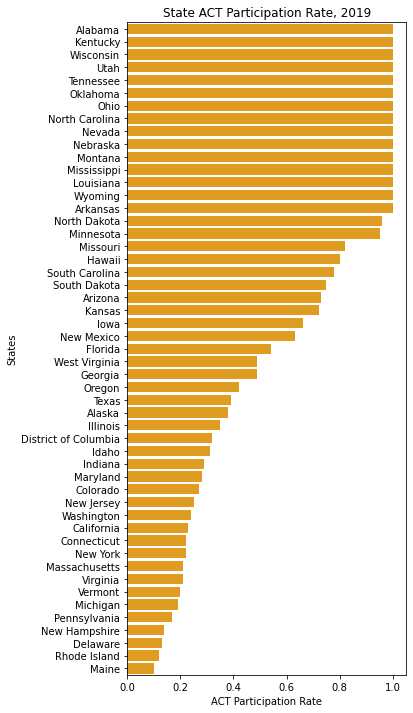

In [74]:
plt.figure(figsize=(5,12))
sns.barplot(x ='act_participation', 
            y='state', 
            data=state_2019, 
            order=state_2019.sort_values('act_participation', ascending = False).state, color= 'orange')
plt.xlabel('ACT Participation Rate')
plt.ylabel('States')
plt.title("State ACT Participation Rate, 2019")

### 5.2 2019 SAT Participation Rate by State (Bar Plot)

Text(0.5, 1.0, 'State SAT Participation Rate, 2019')

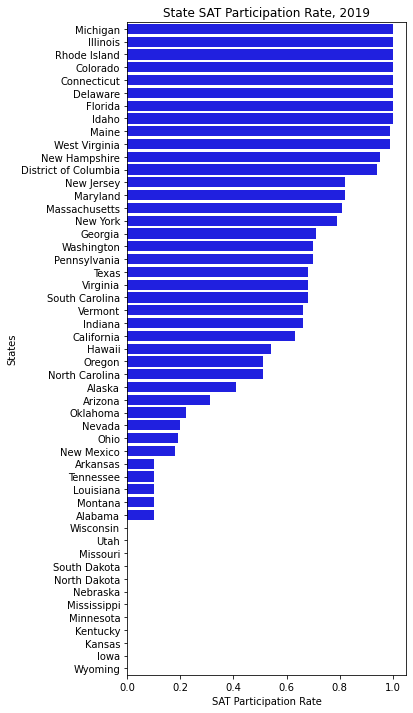

In [75]:
plt.figure(figsize=(5,12))
sns.barplot(x ='sat_participation', 
            y='state', 
            data=state_2019, 
            order=state_2019.sort_values('sat_participation', ascending = False).state, color= 'blue')
plt.xlabel('SAT Participation Rate')
plt.ylabel('States')
plt.title("State SAT Participation Rate, 2019")

### 5.3 State ACT/SAT Participation Rate Distribution (Boxplot)

In [76]:
# describing the ACT participation rate by State
state_2019['act_participation'].describe()

count    51.000000
mean      0.587451
std       0.343982
min       0.100000
25%       0.245000
50%       0.540000
75%       1.000000
max       1.000000
Name: act_participation, dtype: float64

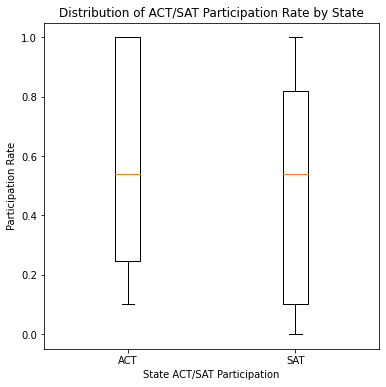

In [77]:
# using a boxplot to show the distribution
plt.figure(figsize=(6,6))
plt.title('Distribution of ACT/SAT Participation Rate by State')
plt.xlabel('State ACT/SAT Participation')
plt.ylabel('Participation Rate')
plt.boxplot([state_2019['act_participation'], state_2019['sat_participation']])
plt.xticks([1, 2], ['ACT', 'SAT'])
plt.show()

### 5.4 California School SAT Participation Rate (Histogram and Kernel Density)

In [78]:
sat_2019_ca.shape

(2580, 16)

In [79]:
# checking how many schools in the DataFrame have participation rate = 0
len(sat_2019_ca[sat_2019_ca['participation_1112'] == 0])

148

Amongst all California school districts, there are 148 schools that currently have zero participation rate. Since many of the school have nearly zero participation, but not exact zero, I also include a Kernel Density Curve to show the distribution.

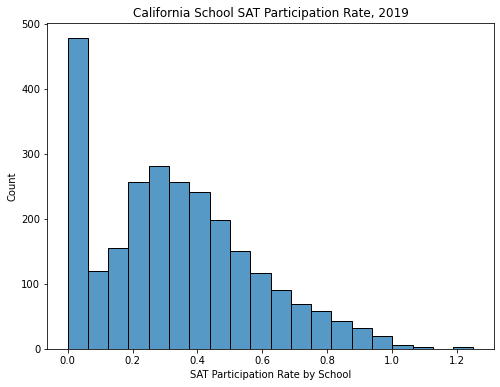

In [80]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'participation_1112', data = sat_2019_ca, bins = 20)
plt.xlabel('SAT Participation Rate by School')
plt.title("California School SAT Participation Rate, 2019")
plt.show()

<Figure size 720x432 with 0 Axes>

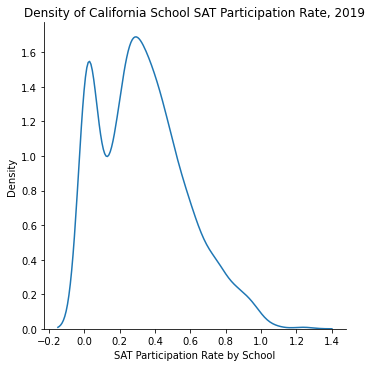

In [81]:
# Kernel Density Curve using sns.displot()
plt.figure(figsize=(10,6))
sns.displot(x='participation_1112', data = sat_2019_ca, kind="kde")
plt.xlabel('SAT Participation Rate by School')
plt.title("Density of California School SAT Participation Rate, 2019")
plt.show()

## 6. Exporting the DataSet

### 6.1. Analysis Data

In [82]:
# using df.to_csv(index=False)
# sample: df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)

# Export the list of school district with schools having 0% SAT participation rates
zero_district.to_csv(r'../data/zero_districts.csv', index=False, header=True)

In [83]:
# Export the list of school district with schools having below state average SAT participation rate
below_mean_district.to_csv(r'../data/below_mean_districts.csv', index=False, header=True)

In [84]:
# Export the 2019 ACT and SAT Participation Rate by State after merging
state_2019.to_csv(r'../data/act_sat_2019.csv', index=False, header=True)

In [85]:
# Export the 2019 California SAT Participation Rate by State
sat_2019_ca.to_csv(r'../data/sat_2019_ca_clean.csv', index=False, header=True)

### 6.2 List of School Districts for Program Implementation

## 7. Conclusions and Recommendations

Based on our analysis of the 2019 State SAT/ACT Data and the 2019 California SAT Data, we see an urgent need of a program, such as the "Test for Success CA" that we are proposing here, to provide funding for school districts to improve their students' ACT/SAT participation rates, to further improve the college application rates, and ultimately to improve college attendance and attainment. 

**Recommendations for rolling out the "Test for Success Program:**
- Stage 1: school districts with ZERO participation rate schools
- Stage 2: school districts have school participation rates below state average
- Stage 3: all school districts in California 

**Next Step:** 
- Approve and implement the "Test for Success CA" Project
- School districts in stage 1 to do a in-house check and proposal school-level programs/interventions to use the budget
- The Department of Education to set up working committee to oversea "Test for Success CA"
- The working committee to discuss plans for Stage 2 implementation

**Ultimate Goal: achieve 100% participation rates by 2025** 


Thank you. =)